## mtvs_AI_07-13

- Sequential layer structure

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1")) # layer name 지정 권장
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

x = tf.ones((3, 3))
y = model(x)
model.summary()



Model: "my_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (3, 2)                    8         
                                                                 
 layer2 (Dense)              (3, 3)                    9         
                                                                 
 layer3 (Dense)              (3, 4)                    16        
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.pop()
model.summary()

Model: "my_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (3, 2)                    8         
                                                                 
 layer2 (Dense)              (3, 3)                    9         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.pop()
model.summary()

Model: "my_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (3, 2)                    8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


###  pop 진행시 LILO가 진행, 스택과 같은 구조,
### 텐서는 stack을 사용한다. ( 큐 -> 프린터)


### 일반적인 디버깅 워크플로우: add() + summary()
- 새로운 Sequential 아키텍처를 구축할 때는 add() 하여 레이어를 점진적으로 쌓고 모델 요약을 자주 인쇄하는 것이 유용합니다. 예를 들어 Conv2D 및 MaxPooling2D 레이어의 스택이 이미지 특성 맵을 다운 샘플링 하는 방법을 모니터링할 수 있습니다.
- 참조 : https://www.tensorflow.org/guide/keras/sequential_model?hl=ko
- autoencoder 가면 layer가 안 맞으면 오류가 뜸, 숫자가 맞아야함


### 모델이 완성되면 해야 할 일
- 모델을 훈련시키고 평가하며 추론을 실행
- model.fit() , model.evaluate() , model.predict()
- model.fit() -> 참조 : https://www.tensorflow.org/guide/keras/customizing_what_happens_in_fit/?hl=ko
- Sequential 모델이 빌드되면 Functional API 모델처럼 동작

### Sequential 모델을 통한 전이 학습
- Sequential 모델이 있고 마지막 모델을 제외한 모든 레이어를 동결하려고 한다고 가정합니다. 이 경우 다음과 같이 단순히 model.layers를 반복하고 마지막 레이어를 제외하고 각 레이어에서 layer.trainable = False를 설정


## keras 모델생성 시 참고 해야 할것

- 순차 모델 : https://www.tensorflow.org/guide/keras/sequential_model?hl=ko
- 함수형 API : https://www.tensorflow.org/guide/keras/functional?hl=ko


## TensroFlow 회귀
- 참조 : https://www.tensorflow.org/tutorials/keras/regression?hl=ko

In [144]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__) # 버전 호환도가 떨어지기 때문에 버전은 확인 해야함
# 참조 : https://www.tensorflow.org/tutorials/keras/regression?hl=ko

2.9.1


In [145]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\HP\\.keras\\datasets\\auto-mpg.data'

In [146]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
#na_values 비어있는 값은 ?로 하겠다.

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [147]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [148]:
dataset = dataset.dropna()

In [149]:
origin = dataset.pop('Origin')

In [47]:
# dataset['USA'] = (dataset['Origin'] == 1)*1.0
# dataset['Europe'] = (dataset['Origin'] == 2)*1.0
# dataset['Japan'] = (dataset['Origin'] == 3)*1.0
# dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,1.0,0.0,0.0


In [150]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [151]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

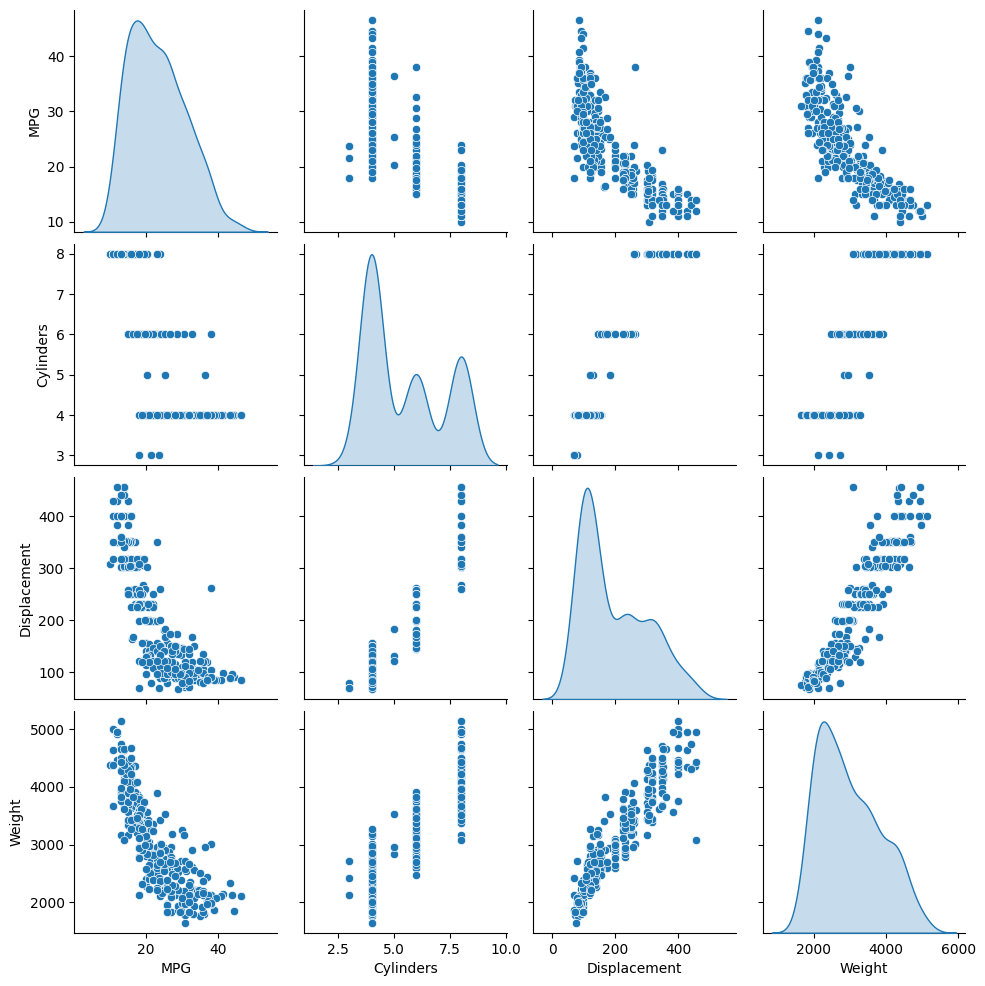

In [153]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

전처리 목적이 아니다 보니 공선성 같은것들을 보기 보다는
한번 보는 목적, 빠른 작업이 중요할 수도 있다.

In [154]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


특성과 레이블 분리하기

- 특성에서 타깃 값 또는 "레이블"을 분리합니다. 이 레이블을 예측하기 위해 모델을 훈련

In [58]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [59]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [62]:
len(train_dataset.keys())

9

In [130]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, 
                     activation='relu', 
                     input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
        ])

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001) # lr을 명확하게 입력 해도 되고, 아니어도
    model.compile(loss = 'mse', 
                  optimizer=optimizer, 
                  metrics=['mae','mse'])
    
    return model



# keras Document에서 함수의 원리 확인해볼것

In [131]:
model = build_model()
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 64)                640       
                                                                 
 dense_51 (Dense)            (None, 64)                4160      
                                                                 
 dense_52 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [132]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 25ms/step


array([[-0.01125454],
       [-0.00663215],
       [ 0.21194   ],
       [ 0.06071838],
       [-0.21893112],
       [ 0.11916369],
       [-0.22392085],
       [-0.00789716],
       [ 0.00047236],
       [-0.4456867 ]], dtype=float32)

In [133]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [141]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100
batch = 32



# 모델 저장의 조건을 설정합니다.
modelpath=".\\mpg\\model\\all\\{epoch:02d}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, batch_size = batch,
    validation_split = 0.2, verbose=1,
    callbacks=[checkpointer])
# callback 옵션을 사용하여 epochs가 끝날때 마다 저장합니다.


# 8/8은 배치사이즈를 횟수를 의미
# optimizer RMSprop 의 배치 사이즈는 따로 지정 되어 있지 않다.
# 데이터 셋 312 , 트레인 0.8, 배치 사이즈 는 디폴트값 32
# (312*0.8)/32 = 7.800000000000001
# 약 7.8정도로 총 8번 돌아간다.
# 8/8 .... 1/8, 2/8, ..... 8/8
# 배치 사이즈도 같이 고민을 해야된다.


Epoch 1/100
1/8 [==>...........................] - ETA: 0s - loss: 4.3599 - mae: 1.3828 - mse: 4.3599
Epoch 1: saving model to .\mpg\model\all\01.hdf5
8/8 [==============================] - 0s 4ms/step - loss: 5.2368 - mae: 1.5478 - mse: 5.2368 - val_loss: 8.4122 - val_mae: 2.1807 - val_mse: 8.4122
Epoch 2/100
1/8 [==>...........................] - ETA: 0s - loss: 3.1209 - mae: 1.3194 - mse: 3.1209
Epoch 2: saving model to .\mpg\model\all\02.hdf5
8/8 [==============================] - 0s 4ms/step - loss: 5.2345 - mae: 1.5683 - mse: 5.2345 - val_loss: 8.4674 - val_mae: 2.1883 - val_mse: 8.4674
Epoch 3/100
1/8 [==>...........................] - ETA: 0s - loss: 8.1031 - mae: 2.0290 - mse: 8.1031
Epoch 3: saving model to .\mpg\model\all\03.hdf5
8/8 [==============================] - 0s 4ms/step - loss: 5.0016 - mae: 1.5588 - mse: 5.0016 - val_loss: 8.1654 - val_mae: 2.2572 - val_mse: 8.1654
Epoch 4/100
1/8 [==>...........................] - ETA: 0s - loss: 5.1402 - mae: 1.6596 - mse: 5.140

1/8 [==>...........................] - ETA: 0s - loss: 7.9003 - mae: 1.9540 - mse: 7.9003
Epoch 28: saving model to .\mpg\model\all\28.hdf5
8/8 [==============================] - 0s 4ms/step - loss: 5.2898 - mae: 1.5801 - mse: 5.2898 - val_loss: 8.3738 - val_mae: 2.1987 - val_mse: 8.3738
Epoch 29/100
1/8 [==>...........................] - ETA: 0s - loss: 7.3036 - mae: 1.9093 - mse: 7.3036
Epoch 29: saving model to .\mpg\model\all\29.hdf5
8/8 [==============================] - 0s 4ms/step - loss: 5.1439 - mae: 1.5373 - mse: 5.1439 - val_loss: 8.3217 - val_mae: 2.2383 - val_mse: 8.3217
Epoch 30/100
1/8 [==>...........................] - ETA: 0s - loss: 5.6550 - mae: 1.4838 - mse: 5.6550
Epoch 30: saving model to .\mpg\model\all\30.hdf5
8/8 [==============================] - 0s 4ms/step - loss: 5.0411 - mae: 1.5061 - mse: 5.0411 - val_loss: 8.2610 - val_mae: 2.2019 - val_mse: 8.2610
Epoch 31/100
1/8 [==>...........................] - ETA: 0s - loss: 4.0574 - mae: 1.4081 - mse: 4.0574
Epoc

1/8 [==>...........................] - ETA: 0s - loss: 3.9247 - mae: 1.5431 - mse: 3.9247
Epoch 55: saving model to .\mpg\model\all\55.hdf5
8/8 [==============================] - 0s 4ms/step - loss: 5.0671 - mae: 1.5178 - mse: 5.0671 - val_loss: 8.4422 - val_mae: 2.2421 - val_mse: 8.4422
Epoch 56/100
1/8 [==>...........................] - ETA: 0s - loss: 4.9010 - mae: 1.5291 - mse: 4.9010
Epoch 56: saving model to .\mpg\model\all\56.hdf5
8/8 [==============================] - 0s 4ms/step - loss: 4.8006 - mae: 1.5097 - mse: 4.8006 - val_loss: 8.4068 - val_mae: 2.2847 - val_mse: 8.4068
Epoch 57/100
1/8 [==>...........................] - ETA: 0s - loss: 8.3148 - mae: 1.8358 - mse: 8.3148
Epoch 57: saving model to .\mpg\model\all\57.hdf5
8/8 [==============================] - 0s 4ms/step - loss: 4.8613 - mae: 1.5065 - mse: 4.8613 - val_loss: 8.9198 - val_mae: 2.3630 - val_mse: 8.9198
Epoch 58/100
1/8 [==>...........................] - ETA: 0s - loss: 9.2298 - mae: 1.7849 - mse: 9.2298
Epoc

1/8 [==>...........................] - ETA: 0s - loss: 2.5151 - mae: 1.2759 - mse: 2.5151
Epoch 82: saving model to .\mpg\model\all\82.hdf5
8/8 [==============================] - 0s 4ms/step - loss: 4.8003 - mae: 1.4684 - mse: 4.8003 - val_loss: 8.8143 - val_mae: 2.3413 - val_mse: 8.8143
Epoch 83/100
1/8 [==>...........................] - ETA: 0s - loss: 5.8952 - mae: 1.6541 - mse: 5.8952
Epoch 83: saving model to .\mpg\model\all\83.hdf5
8/8 [==============================] - 0s 4ms/step - loss: 4.8216 - mae: 1.4864 - mse: 4.8216 - val_loss: 8.6194 - val_mae: 2.3192 - val_mse: 8.6194
Epoch 84/100
1/8 [==>...........................] - ETA: 0s - loss: 4.0532 - mae: 1.3319 - mse: 4.0532
Epoch 84: saving model to .\mpg\model\all\84.hdf5
8/8 [==============================] - 0s 3ms/step - loss: 4.7571 - mae: 1.4769 - mse: 4.7571 - val_loss: 8.7018 - val_mae: 2.2681 - val_mse: 8.7018
Epoch 85/100
1/8 [==>...........................] - ETA: 0s - loss: 6.2466 - mae: 1.6617 - mse: 6.2466
Epoc

In [139]:
score=model.evaluate(normed_train_data, train_labels)
print('Test accuracy:', score[1])

10/10 [==============================] - 0s 2ms/step - loss: 5.6555 - mae: 1.6703 - mse: 5.6555
Test accuracy: 1.670285940170288


In [143]:
from glob import glob
import tensorflow as tf

model_List = glob('.\\mpg\\model\\all\\*.hdf5')

for i in model_List:
    loadModel = tf.keras.models.load_model(i)
    score = loadModel.evaluate(normed_train_data, train_labels)
    print(i)
    print('test accuracy:' , score[1])


10/10 [==============================] - 0s 889us/step - loss: 5.6636 - mae: 1.6723 - mse: 5.6636
.\mpg\model\all\01.hdf5
test accuracy: 1.672332763671875
10/10 [==============================] - 0s 778us/step - loss: 5.7083 - mae: 1.6921 - mse: 5.7083
.\mpg\model\all\02.hdf5
test accuracy: 1.6920570135116577
10/10 [==============================] - 0s 896us/step - loss: 5.6916 - mae: 1.6516 - mse: 5.6916
.\mpg\model\all\03.hdf5
test accuracy: 1.651584506034851
10/10 [==============================] - 0s 893us/step - loss: 5.6868 - mae: 1.6481 - mse: 5.6868
.\mpg\model\all\04.hdf5
test accuracy: 1.6480802297592163
10/10 [==============================] - 0s 898us/step - loss: 5.7799 - mae: 1.6805 - mse: 5.7799
.\mpg\model\all\05.hdf5
test accuracy: 1.6805272102355957
10/10 [==============================] - 0s 781us/step - loss: 5.6209 - mae: 1.6723 - mse: 5.6209
.\mpg\model\all\06.hdf5
test accuracy: 1.6722520589828491
10/10 [==============================] - 0s 889us/step - loss: 5.5

10/10 [==============================] - 0s 778us/step - loss: 5.5748 - mae: 1.6356 - mse: 5.5748
.\mpg\model\all\53.hdf5
test accuracy: 1.6355998516082764
10/10 [==============================] - 0s 742us/step - loss: 5.3876 - mae: 1.6025 - mse: 5.3876
.\mpg\model\all\54.hdf5
test accuracy: 1.6025059223175049
10/10 [==============================] - 0s 772us/step - loss: 5.4533 - mae: 1.6406 - mse: 5.4533
.\mpg\model\all\55.hdf5
test accuracy: 1.6406080722808838
10/10 [==============================] - 0s 778us/step - loss: 5.5389 - mae: 1.6268 - mse: 5.5389
.\mpg\model\all\56.hdf5
test accuracy: 1.6267606019973755
10/10 [==============================] - 0s 782us/step - loss: 5.7786 - mae: 1.6699 - mse: 5.7786
.\mpg\model\all\57.hdf5
test accuracy: 1.6698542833328247
10/10 [==============================] - 0s 674us/step - loss: 5.5175 - mae: 1.6207 - mse: 5.5175
.\mpg\model\all\58.hdf5
test accuracy: 1.6206756830215454
10/10 [==============================] - 0s 780us/step - loss: 5

In [113]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,5.615497,1.663814,5.615497,8.219390,2.250384,8.219390,95
96,5.606069,1.633532,5.606069,8.028462,2.143576,8.028462,96
97,5.733397,1.652764,5.733397,8.131550,2.133861,8.131550,97
98,5.753654,1.663913,5.753654,7.936863,2.139575,7.936863,98
99,5.620616,1.673700,5.620616,8.790444,2.366555,8.790444,99


In [ ]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch

# hist['epoch']hist['val_loss'] == 

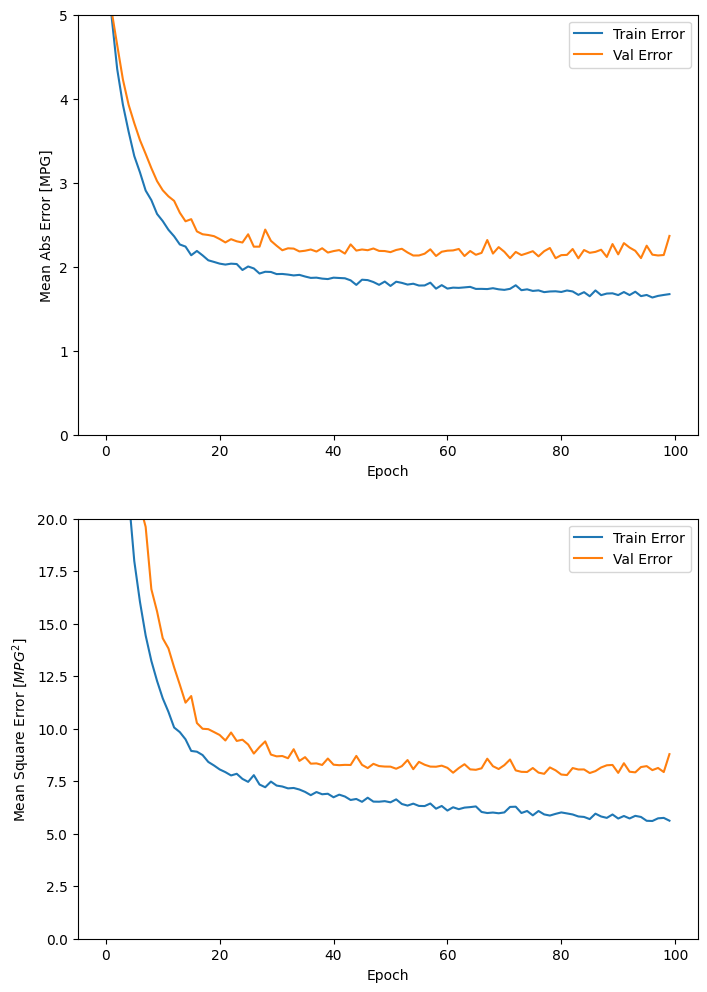

In [114]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


................................................

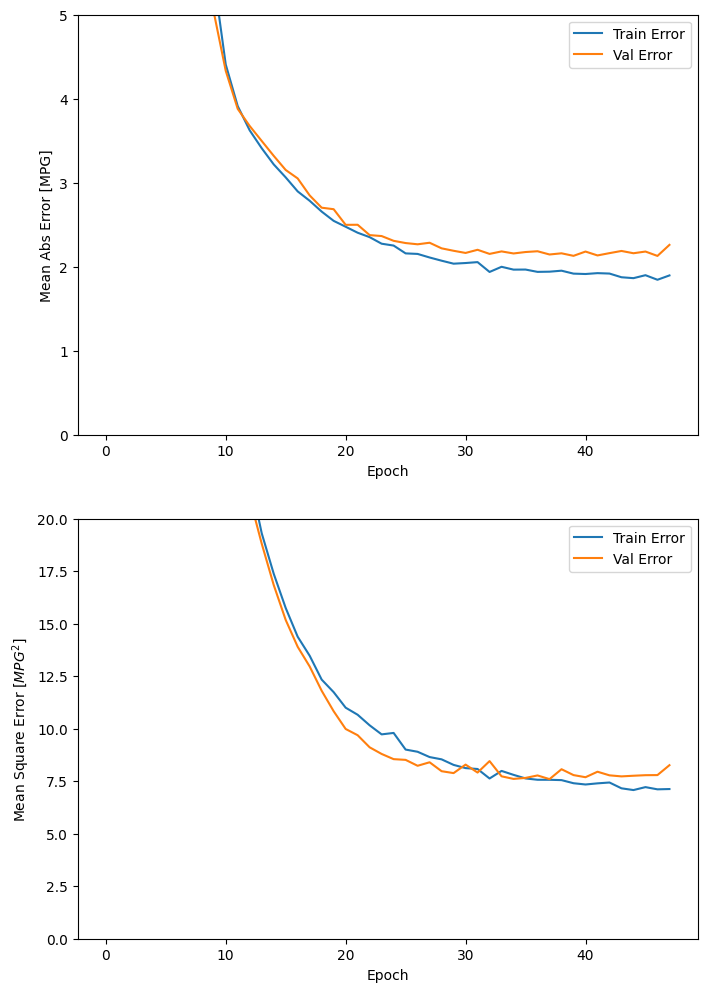

In [115]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [116]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 5.7464 - mae: 1.8154 - mse: 5.7464 - 19ms/epoch - 6ms/step
테스트 세트의 평균 절대 오차:  1.82 MPG


In [117]:
test_predictions = model.predict(normed_test_data).flatten()

3/3 [==============================] - 0s 1ms/step


In [119]:
import numpy as np

np.zeros((3,3)).flatten()

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [121]:
model.predict(normed_test_data)[:5][0] - test_labels[:5]

3/3 [==============================] - 0s 1ms/step


9     1.398973
25    6.398973
28    7.398973
31   -8.601027
33   -2.601027
Name: MPG, dtype: float64

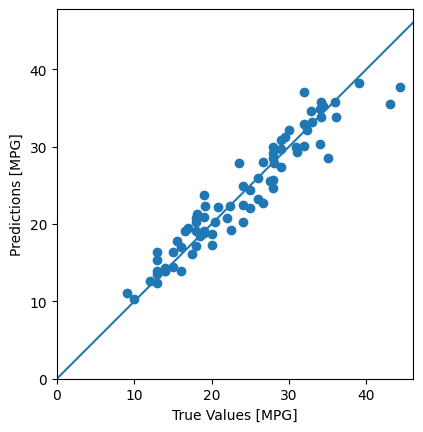

In [122]:
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

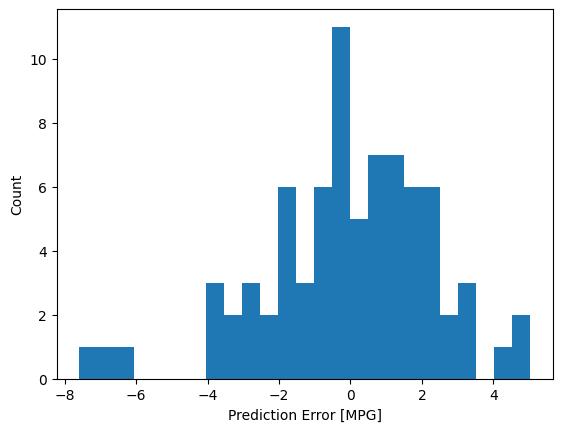

In [123]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

하이퍼 파라미터 튜닝 
- layers를 몇개 더 넣을 것인가
- 옵티마이저를 몇개를 더 쓸것인가?
- 옵션값들을 조정하는것
- 같은 작업을 하더라도 사람이 하나하나 작업 하는게 힘들다
- 옵션값 여러개 넣고 최적의 값을 찾아내는 튜닝이 가능하다.
- 가장 좋은 모델을 찾아낼수 있다.
- 튜너로 작업하는게 가장 중요한 자료이다.
- 타이타닉 데이터에 튜너를 넣고 세이브 까지 같이 하는것

keras create layer 함수 추가

In [ ]:
def creat_layer():
        # Define Sequential model with 3 layers
    model = keras.Sequential([
            layers.Dense(2, activation="relu", name="layer1"),
            layers.Dense(3, activation="relu", name="layer2"),
            layers.Dense(4, name="layer3"),
        ])
    
    

--------------------------------------------------------------------------------

2시 20분 새로운 강의, 한번 다시 코드 해주는 강의

In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

In [155]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

df = raw_dataset.copy()
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [156]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [157]:
df = df.dropna()

In [158]:
origin = df.pop('Origin')

In [159]:
df['USA'] = (origin == 1)*1.0
df['Europe'] = (origin == 2)*1.0
df['Japan'] = (origin == 3)*1.0
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [183]:
from sklearn.model_selection import train_test_split


X = df.iloc[:,1:] # MPG 를 제외한 1번열부터 마지막열까지
y = df.iloc[:,0] # MPG를 y데이터로


# 큰값이 있다면 정규화 시켜줄것을 권장
#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [184]:
#len(X_train.columns)

In [185]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=[len(X_train.keys())]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.

optimizer = tf.keras.optimizers.RMSprop(0.001) #tunner 문제로 따로 떼어놓음
model.compile(loss='binary_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy','mae', 'mse'])

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 64)                640       
                                                                 
 dense_72 (Dense)            (None, 64)                4160      
                                                                 
 dense_73 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [186]:
# 모델 저장의 조건을 설정합니다.
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다. 
history=model.fit(X_train, y_train, epochs=50, 
                  batch_size=500, validation_split=0.25, 
                  verbose=1, callbacks=[checkpointer])
#verbose 이차이가 다르다, 0, 1, 2 => 출력 결과물이 다르게 나온다.

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: -4191.5439 - accuracy: 0.0000e+00 - mae: 22.1970 - mse: 556.1030
Epoch 1: saving model to ./data/model/all\01-0.0000.hdf5
1/1 [==============================] - 0s 376ms/step - loss: -4191.5439 - accuracy: 0.0000e+00 - mae: 22.1970 - mse: 556.1030 - val_loss: -7639.3711 - val_accuracy: 0.0000e+00 - val_mae: 22.9266 - val_mse: 575.9322
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: -7732.8994 - accuracy: 0.0000e+00 - mae: 22.1970 - mse: 556.1030
Epoch 2: saving model to ./data/model/all\02-0.0000.hdf5
1/1 [==============================] - 0s 27ms/step - loss: -7732.8994 - accuracy: 0.0000e+00 - mae: 22.1970 - mse: 556.1030 - val_loss: -10388.3896 - val_accuracy: 0.0000e+00 - val_mae: 22.9266 - val_mse: 575.9322
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: -10527.0498 - accuracy: 0.0000e+00 - mae: 22.1970 - mse: 556.1029
Epoch 3: saving model to ./data/model/all\03-0.0000.hdf5
1/1 [

1/1 [==============================] - ETA: 0s - loss: -44516.9102 - accuracy: 0.0000e+00 - mae: 22.1970 - mse: 556.1030
Epoch 21: saving model to ./data/model/all\21-0.0000.hdf5
1/1 [==============================] - 0s 28ms/step - loss: -44516.9102 - accuracy: 0.0000e+00 - mae: 22.1970 - mse: 556.1030 - val_loss: -45804.7734 - val_accuracy: 0.0000e+00 - val_mae: 22.9266 - val_mse: 575.9322
Epoch 22/50
1/1 [==============================] - ETA: 0s - loss: -46435.5430 - accuracy: 0.0000e+00 - mae: 22.1970 - mse: 556.1030
Epoch 22: saving model to ./data/model/all\22-0.0000.hdf5
1/1 [==============================] - 0s 27ms/step - loss: -46435.5430 - accuracy: 0.0000e+00 - mae: 22.1970 - mse: 556.1030 - val_loss: -47731.8867 - val_accuracy: 0.0000e+00 - val_mae: 22.9266 - val_mse: 575.9322
Epoch 23/50
1/1 [==============================] - ETA: 0s - loss: -48389.2070 - accuracy: 0.0000e+00 - mae: 22.1970 - mse: 556.1030
Epoch 23: saving model to ./data/model/all\23-0.0000.hdf5
1/1 [==

1/1 [==============================] - ETA: 0s - loss: -89281.0703 - accuracy: 0.0000e+00 - mae: 22.1970 - mse: 556.1030
Epoch 41: saving model to ./data/model/all\41-0.0000.hdf5
1/1 [==============================] - 0s 28ms/step - loss: -89281.0703 - accuracy: 0.0000e+00 - mae: 22.1970 - mse: 556.1030 - val_loss: -90676.7969 - val_accuracy: 0.0000e+00 - val_mae: 22.9266 - val_mse: 575.9322
Epoch 42/50
1/1 [==============================] - ETA: 0s - loss: -91924.9141 - accuracy: 0.0000e+00 - mae: 22.1970 - mse: 556.1029
Epoch 42: saving model to ./data/model/all\42-0.0000.hdf5
1/1 [==============================] - 0s 27ms/step - loss: -91924.9141 - accuracy: 0.0000e+00 - mae: 22.1970 - mse: 556.1029 - val_loss: -93328.7266 - val_accuracy: 0.0000e+00 - val_mae: 22.9266 - val_mse: 575.9322
Epoch 43/50
1/1 [==============================] - ETA: 0s - loss: -94613.2969 - accuracy: 0.0000e+00 - mae: 22.1970 - mse: 556.1029
Epoch 43: saving model to ./data/model/all\43-0.0000.hdf5
1/1 [==

In [175]:
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

3/3 [==============================] - 0s 2ms/step - loss: -21921.3047 - accuracy: 0.0000e+00
Test accuracy: 0.0


In [192]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,564.685974,22.524244,564.685974,553.298584,22.227562,553.298584,0
1,512.448364,21.345228,512.448364,500.781616,20.997637,500.781616,1
2,461.421234,20.128450,461.421234,442.429016,19.567015,442.429016,2
3,406.007935,18.729002,406.007935,381.118713,17.965816,381.118713,3
4,346.213165,17.138931,346.213135,314.580505,16.113194,314.580505,4


In [176]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수 있습니다)
#history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

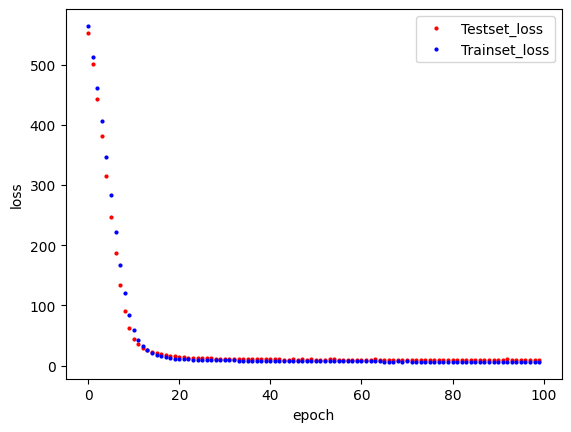

In [198]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

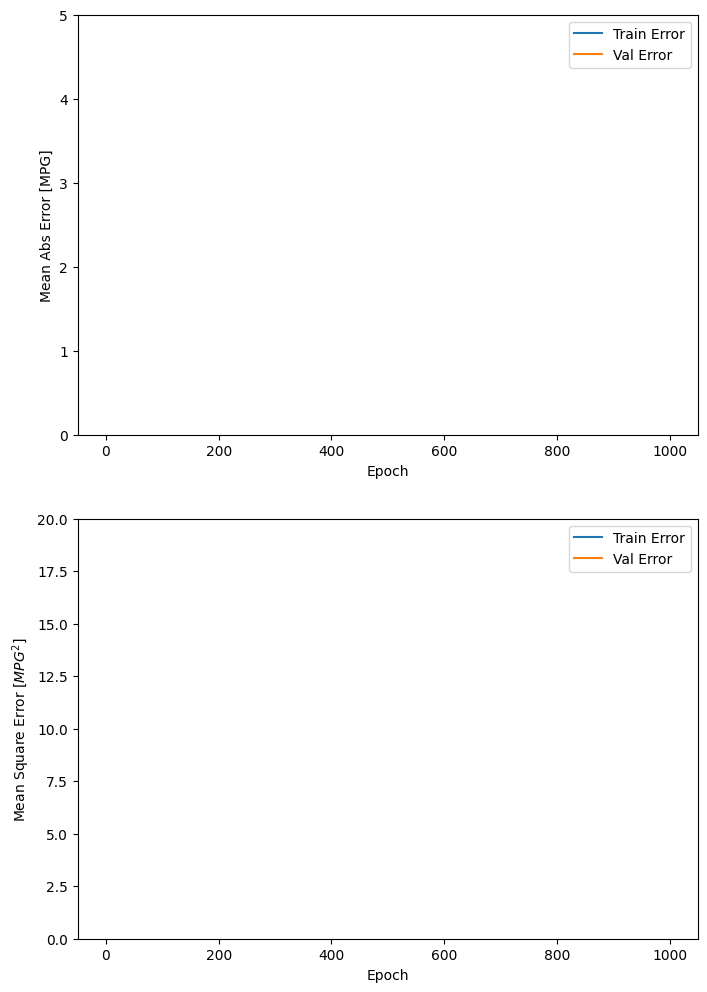

In [199]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

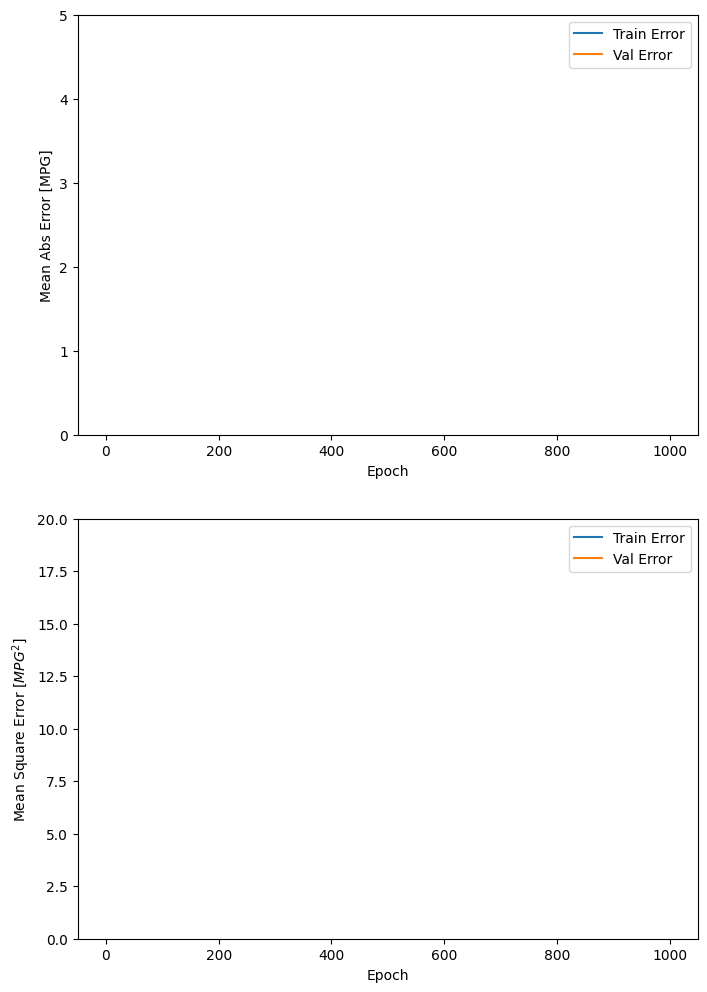

In [200]:

plot_history(history)


.....................................................

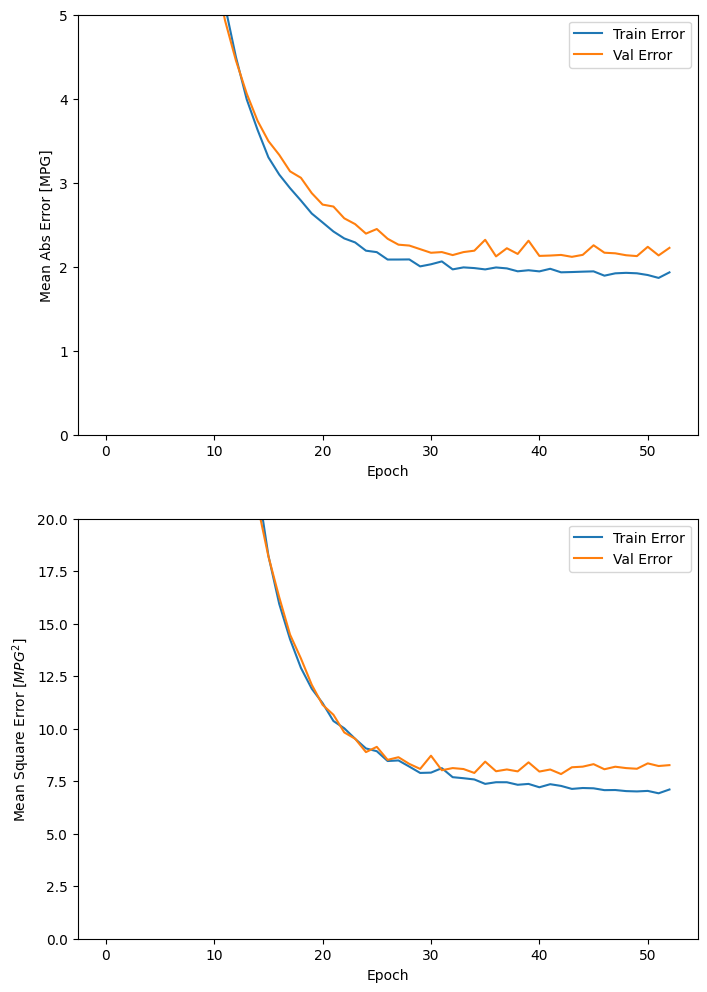

In [202]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

----------------EPOCHS = 1000 이상으로 다시 학습 --------------------------------

In [203]:
EPOCHS = 1000

history=model.fit(X_train, y_train, epochs=EPOCHS, 
                  batch_size=500, validation_split=0.25, 
                  verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 49ms/step - loss: 46613148.0000 - mae: 6581.7251 - mse: 46613148.0000 - val_loss: 33022490.0000 - val_mae: 5577.3667 - val_mse: 33022490.0000
Epoch 2/1000
1/1 [==============================] - 0s 16ms/step - loss: 38111472.0000 - mae: 5952.8906 - mse: 38111472.0000 - val_loss: 28605988.0000 - val_mae: 5192.1196 - val_mse: 28605988.0000
Epoch 3/1000
1/1 [==============================] - 0s 16ms/step - loss: 33012168.0000 - mae: 5541.3491 - mse: 33012168.0000 - val_loss: 25366128.0000 - val_mae: 4890.1846 - val_mse: 25366128.0000
Epoch 4/1000
1/1 [==============================] - 0s 16ms/step - loss: 29271164.0000 - mae: 5218.8257 - mse: 29271164.0000 - val_loss: 22789230.0000 - val_mae: 4636.0112 - val_mse: 22789230.0000
Epoch 5/1000
1/1 [==============================] - 0s 16ms/step - loss: 26295272.0000 - mae: 4947.2969 - mse: 26295272.0000 - val_loss: 20644894.0000 - val_mae: 4413.3696 - val_mse: 20644894.0000
Epoch 6/1000
1/

1/1 [==============================] - 0s 15ms/step - loss: 726394.8750 - mae: 833.6794 - mse: 726394.8750 - val_loss: 559030.0625 - val_mae: 735.5148 - val_mse: 559030.0625
Epoch 44/1000
1/1 [==============================] - 0s 15ms/step - loss: 633401.3125 - mae: 779.1466 - mse: 633401.3125 - val_loss: 485924.5000 - val_mae: 686.0974 - val_mse: 485924.5000
Epoch 45/1000
1/1 [==============================] - 0s 15ms/step - loss: 549397.6250 - mae: 726.2800 - mse: 549397.6250 - val_loss: 420174.7188 - val_mae: 638.2925 - val_mse: 420174.7188
Epoch 46/1000
1/1 [==============================] - 0s 15ms/step - loss: 473944.3125 - mae: 675.1751 - mse: 473944.3125 - val_loss: 361471.9375 - val_mae: 592.2477 - val_mse: 361471.9375
Epoch 47/1000
1/1 [==============================] - 0s 14ms/step - loss: 406564.3750 - mae: 625.9173 - mse: 406564.3750 - val_loss: 309374.3125 - val_mae: 548.0392 - val_mse: 309374.3125
Epoch 48/1000
1/1 [==============================] - 0s 15ms/step - loss: 

1/1 [==============================] - 0s 18ms/step - loss: 5338.8491 - mae: 63.2010 - mse: 5338.8491 - val_loss: 7534.5078 - val_mae: 69.7728 - val_mse: 7534.5078
Epoch 89/1000
1/1 [==============================] - 0s 19ms/step - loss: 5307.3174 - mae: 63.0048 - mse: 5307.3174 - val_loss: 7493.7822 - val_mae: 69.5550 - val_mse: 7493.7822
Epoch 90/1000
1/1 [==============================] - 0s 17ms/step - loss: 5273.9443 - mae: 62.7941 - mse: 5273.9443 - val_loss: 7451.1431 - val_mae: 69.3267 - val_mse: 7451.1431
Epoch 91/1000
1/1 [==============================] - 0s 17ms/step - loss: 5238.6113 - mae: 62.5677 - mse: 5238.6113 - val_loss: 7406.7793 - val_mae: 69.0878 - val_mse: 7406.7793
Epoch 92/1000
1/1 [==============================] - 0s 15ms/step - loss: 5201.4380 - mae: 62.3258 - mse: 5201.4380 - val_loss: 7360.5869 - val_mae: 68.8377 - val_mse: 7360.5869
Epoch 93/1000
1/1 [==============================] - 0s 15ms/step - loss: 5162.8604 - mae: 62.0733 - mse: 5162.8604 - val_lo

Epoch 134/1000
1/1 [==============================] - 0s 16ms/step - loss: 3604.2434 - mae: 46.2035 - mse: 3604.2434 - val_loss: 4890.0859 - val_mae: 58.6388 - val_mse: 4890.0859
Epoch 135/1000
1/1 [==============================] - 0s 15ms/step - loss: 3321.3420 - mae: 50.2341 - mse: 3321.3420 - val_loss: 4718.7988 - val_mae: 49.6034 - val_mse: 4718.7988
Epoch 136/1000
1/1 [==============================] - 0s 15ms/step - loss: 3197.3064 - mae: 45.7779 - mse: 3197.3064 - val_loss: 4679.5020 - val_mae: 56.1830 - val_mse: 4679.5020
Epoch 137/1000
1/1 [==============================] - 0s 16ms/step - loss: 3128.2283 - mae: 48.3355 - mse: 3128.2283 - val_loss: 4592.3203 - val_mae: 49.3245 - val_mse: 4592.3203
Epoch 138/1000
1/1 [==============================] - 0s 15ms/step - loss: 3087.8752 - mae: 45.2812 - mse: 3087.8752 - val_loss: 4591.1621 - val_mae: 55.7958 - val_mse: 4591.1621
Epoch 139/1000
1/1 [==============================] - 0s 15ms/step - loss: 3070.1155 - mae: 47.9300 - mse

Epoch 180/1000
1/1 [==============================] - 0s 15ms/step - loss: 3851.7410 - mae: 41.1143 - mse: 3851.7410 - val_loss: 4552.4121 - val_mae: 60.5036 - val_mse: 4552.4121
Epoch 181/1000
1/1 [==============================] - 0s 16ms/step - loss: 3770.8330 - mae: 55.5757 - mse: 3770.8330 - val_loss: 4657.3467 - val_mae: 40.1806 - val_mse: 4657.3467
Epoch 182/1000
1/1 [==============================] - 0s 15ms/step - loss: 3840.0513 - mae: 41.0844 - mse: 3840.0513 - val_loss: 4658.4199 - val_mae: 61.5653 - val_mse: 4658.4199
Epoch 183/1000
1/1 [==============================] - 0s 15ms/step - loss: 3926.1470 - mae: 57.0111 - mse: 3926.1470 - val_loss: 4898.7485 - val_mae: 41.5977 - val_mse: 4898.7485
Epoch 184/1000
1/1 [==============================] - 0s 16ms/step - loss: 4138.0273 - mae: 43.0362 - mse: 4138.0273 - val_loss: 4953.2183 - val_mae: 64.0996 - val_mse: 4953.2183
Epoch 185/1000
1/1 [==============================] - 0s 17ms/step - loss: 4301.5791 - mae: 60.1520 - mse

Epoch 226/1000
1/1 [==============================] - 0s 15ms/step - loss: 3597.6023 - mae: 43.2696 - mse: 3597.6023 - val_loss: 3878.6997 - val_mae: 57.0497 - val_mse: 3878.6997
Epoch 227/1000
1/1 [==============================] - 0s 15ms/step - loss: 3563.9194 - mae: 55.2535 - mse: 3563.9194 - val_loss: 4135.7739 - val_mae: 41.4782 - val_mse: 4135.7739
Epoch 228/1000
1/1 [==============================] - 0s 15ms/step - loss: 3608.1245 - mae: 43.6024 - mse: 3608.1245 - val_loss: 3850.2742 - val_mae: 56.8545 - val_mse: 3850.2742
Epoch 229/1000
1/1 [==============================] - 0s 15ms/step - loss: 3551.2695 - mae: 55.1845 - mse: 3551.2695 - val_loss: 4093.9233 - val_mae: 41.3944 - val_mse: 4093.9233
Epoch 230/1000
1/1 [==============================] - 0s 16ms/step - loss: 3572.4480 - mae: 43.5218 - mse: 3572.4480 - val_loss: 3788.7195 - val_mae: 56.3792 - val_mse: 3788.7195
Epoch 231/1000
1/1 [==============================] - 0s 17ms/step - loss: 3497.1111 - mae: 54.7542 - mse

Epoch 272/1000
1/1 [==============================] - 0s 15ms/step - loss: 2952.6238 - mae: 42.0307 - mse: 2952.6238 - val_loss: 2748.3438 - val_mae: 47.7380 - val_mse: 2748.3438
Epoch 273/1000
1/1 [==============================] - 0s 15ms/step - loss: 2618.1387 - mae: 47.1525 - mse: 2618.1387 - val_loss: 2920.1465 - val_mae: 36.0342 - val_mse: 2920.1465
Epoch 274/1000
1/1 [==============================] - 0s 15ms/step - loss: 2482.9370 - mae: 37.5017 - mse: 2482.9370 - val_loss: 2558.5925 - val_mae: 45.9247 - val_mse: 2558.5925
Epoch 275/1000
1/1 [==============================] - 0s 15ms/step - loss: 2404.5369 - mae: 45.0178 - mse: 2404.5369 - val_loss: 2914.7183 - val_mae: 36.2469 - val_mse: 2914.7183
Epoch 276/1000
1/1 [==============================] - 0s 16ms/step - loss: 2485.2151 - mae: 37.7296 - mse: 2485.2151 - val_loss: 2710.5957 - val_mae: 47.4466 - val_mse: 2710.5957
Epoch 277/1000
1/1 [==============================] - 0s 16ms/step - loss: 2606.3003 - mae: 47.0489 - mse

Epoch 318/1000
1/1 [==============================] - 0s 15ms/step - loss: 2803.5479 - mae: 43.9723 - mse: 2803.5479 - val_loss: 2674.1362 - val_mae: 47.8030 - val_mse: 2674.1362
Epoch 319/1000
1/1 [==============================] - 0s 15ms/step - loss: 2797.3860 - mae: 49.0900 - mse: 2797.3860 - val_loss: 3144.8584 - val_mae: 42.8894 - val_mse: 3144.8584
Epoch 320/1000
1/1 [==============================] - 0s 16ms/step - loss: 2866.0178 - mae: 44.6981 - mse: 2866.0178 - val_loss: 2704.5122 - val_mae: 48.1422 - val_mse: 2704.5122
Epoch 321/1000
1/1 [==============================] - 0s 15ms/step - loss: 2843.5347 - mae: 49.5378 - mse: 2843.5347 - val_loss: 3162.2786 - val_mae: 43.2100 - val_mse: 3162.2786
Epoch 322/1000
1/1 [==============================] - 0s 17ms/step - loss: 2890.0232 - mae: 45.0364 - mse: 2890.0232 - val_loss: 2690.7007 - val_mae: 48.0302 - val_mse: 2690.7007
Epoch 323/1000
1/1 [==============================] - 0s 15ms/step - loss: 2835.4480 - mae: 49.4664 - mse

Epoch 364/1000
1/1 [==============================] - 0s 15ms/step - loss: 2653.8625 - mae: 44.5114 - mse: 2653.8625 - val_loss: 2380.3525 - val_mae: 45.2893 - val_mse: 2380.3525
Epoch 365/1000
1/1 [==============================] - 0s 14ms/step - loss: 2605.0454 - mae: 47.2729 - mse: 2605.0454 - val_loss: 2857.0601 - val_mae: 42.9385 - val_mse: 2857.0601
Epoch 366/1000
1/1 [==============================] - 0s 20ms/step - loss: 2636.7161 - mae: 44.4069 - mse: 2636.7161 - val_loss: 2362.9443 - val_mae: 45.1239 - val_mse: 2362.9443
Epoch 367/1000
1/1 [==============================] - 0s 17ms/step - loss: 2589.5815 - mae: 47.1214 - mse: 2589.5815 - val_loss: 2841.9241 - val_mae: 42.8860 - val_mse: 2841.9241
Epoch 368/1000
1/1 [==============================] - 0s 16ms/step - loss: 2623.8137 - mae: 44.3433 - mse: 2623.8137 - val_loss: 2350.8884 - val_mae: 45.0157 - val_mse: 2350.8884
Epoch 369/1000
1/1 [==============================] - 0s 16ms/step - loss: 2580.4990 - mae: 47.0322 - mse

Epoch 410/1000
1/1 [==============================] - 0s 15ms/step - loss: 2500.7517 - mae: 44.1876 - mse: 2500.7517 - val_loss: 2177.3945 - val_mae: 43.4612 - val_mse: 2177.3945
Epoch 411/1000
1/1 [==============================] - 0s 15ms/step - loss: 2457.6001 - mae: 45.8152 - mse: 2457.6001 - val_loss: 2668.9272 - val_mae: 42.8387 - val_mse: 2668.9272
Epoch 412/1000
1/1 [==============================] - 0s 16ms/step - loss: 2498.1987 - mae: 44.2031 - mse: 2498.1987 - val_loss: 2172.1482 - val_mae: 43.4171 - val_mse: 2172.1482
Epoch 413/1000
1/1 [==============================] - 0s 16ms/step - loss: 2454.8545 - mae: 45.7870 - mse: 2454.8545 - val_loss: 2662.3828 - val_mae: 42.8382 - val_mse: 2662.3828
Epoch 414/1000
1/1 [==============================] - 0s 15ms/step - loss: 2493.8262 - mae: 44.2011 - mse: 2493.8262 - val_loss: 2165.0413 - val_mae: 43.3512 - val_mse: 2165.0413
Epoch 415/1000
1/1 [==============================] - 0s 15ms/step - loss: 2449.8638 - mae: 45.7354 - mse

Epoch 456/1000
1/1 [==============================] - 0s 16ms/step - loss: 2385.9241 - mae: 43.9097 - mse: 2385.9241 - val_loss: 2024.4183 - val_mae: 41.9599 - val_mse: 2024.4183
Epoch 457/1000
1/1 [==============================] - 0s 15ms/step - loss: 2344.8047 - mae: 44.6314 - mse: 2344.8047 - val_loss: 2511.0120 - val_mae: 42.6075 - val_mse: 2511.0120
Epoch 458/1000
1/1 [==============================] - 0s 14ms/step - loss: 2382.1394 - mae: 43.9045 - mse: 2382.1394 - val_loss: 2019.0737 - val_mae: 41.9059 - val_mse: 2019.0737
Epoch 459/1000
1/1 [==============================] - 0s 15ms/step - loss: 2341.0447 - mae: 44.5911 - mse: 2341.0447 - val_loss: 2505.2229 - val_mae: 42.6006 - val_mse: 2505.2229
Epoch 460/1000
1/1 [==============================] - 0s 15ms/step - loss: 2378.1963 - mae: 43.8963 - mse: 2378.1963 - val_loss: 2013.4200 - val_mae: 41.8483 - val_mse: 2013.4200
Epoch 461/1000
1/1 [==============================] - 0s 15ms/step - loss: 2336.7961 - mae: 44.5462 - mse

Epoch 502/1000
1/1 [==============================] - 0s 15ms/step - loss: 2283.4319 - mae: 43.4506 - mse: 2283.4319 - val_loss: 1903.4982 - val_mae: 40.7360 - val_mse: 1903.4982
Epoch 503/1000
1/1 [==============================] - 0s 20ms/step - loss: 2242.4990 - mae: 43.6217 - mse: 2242.4990 - val_loss: 2366.8074 - val_mae: 42.1085 - val_mse: 2366.8074
Epoch 504/1000
1/1 [==============================] - 0s 18ms/step - loss: 2277.4717 - mae: 43.4057 - mse: 2277.4717 - val_loss: 1898.2314 - val_mae: 40.6841 - val_mse: 1898.2314
Epoch 505/1000
1/1 [==============================] - 0s 17ms/step - loss: 2237.2798 - mae: 43.5732 - mse: 2237.2798 - val_loss: 2360.2651 - val_mae: 42.0708 - val_mse: 2360.2651
Epoch 506/1000
1/1 [==============================] - 0s 16ms/step - loss: 2272.4980 - mae: 43.3704 - mse: 2272.4980 - val_loss: 1893.9591 - val_mae: 40.6440 - val_mse: 1893.9591
Epoch 507/1000
1/1 [==============================] - 0s 16ms/step - loss: 2233.2209 - mae: 43.5374 - mse

Epoch 548/1000
1/1 [==============================] - 0s 16ms/step - loss: 2189.2837 - mae: 42.8538 - mse: 2189.2837 - val_loss: 1814.3176 - val_mae: 39.8617 - val_mse: 1814.3176
Epoch 549/1000
1/1 [==============================] - 0s 16ms/step - loss: 2149.4980 - mae: 42.7686 - mse: 2149.4980 - val_loss: 2254.0054 - val_mae: 41.5352 - val_mse: 2254.0054
Epoch 550/1000
1/1 [==============================] - 0s 16ms/step - loss: 2185.8970 - mae: 42.8343 - mse: 2185.8970 - val_loss: 1810.9413 - val_mae: 39.8290 - val_mse: 1810.9413
Epoch 551/1000
1/1 [==============================] - 0s 15ms/step - loss: 2146.2910 - mae: 42.7392 - mse: 2146.2910 - val_loss: 2249.3279 - val_mae: 41.5151 - val_mse: 2249.3279
Epoch 552/1000
1/1 [==============================] - 0s 16ms/step - loss: 2182.6965 - mae: 42.8162 - mse: 2182.6965 - val_loss: 1807.0989 - val_mae: 39.7906 - val_mse: 1807.0989
Epoch 553/1000
1/1 [==============================] - 0s 15ms/step - loss: 2142.4648 - mae: 42.7033 - mse

Epoch 594/1000
1/1 [==============================] - 0s 16ms/step - loss: 2100.4946 - mae: 42.2015 - mse: 2100.4946 - val_loss: 1728.3000 - val_mae: 38.9968 - val_mse: 1728.3000
Epoch 595/1000
1/1 [==============================] - 0s 15ms/step - loss: 2059.6069 - mae: 41.9307 - mse: 2059.6069 - val_loss: 2134.2444 - val_mae: 40.8165 - val_mse: 2134.2444
Epoch 596/1000
1/1 [==============================] - 0s 16ms/step - loss: 2095.9092 - mae: 42.1622 - mse: 2095.9092 - val_loss: 1723.5951 - val_mae: 38.9471 - val_mse: 1723.5951
Epoch 597/1000
1/1 [==============================] - 0s 15ms/step - loss: 2054.3682 - mae: 41.8797 - mse: 2054.3682 - val_loss: 2127.1997 - val_mae: 40.7625 - val_mse: 2127.1997
Epoch 598/1000
1/1 [==============================] - 0s 15ms/step - loss: 2089.8169 - mae: 42.1085 - mse: 2089.8169 - val_loss: 1719.0864 - val_mae: 38.8982 - val_mse: 1719.0864
Epoch 599/1000
1/1 [==============================] - 0s 16ms/step - loss: 2049.6140 - mae: 41.8319 - mse

Epoch 640/1000
1/1 [==============================] - 0s 15ms/step - loss: 2007.2159 - mae: 41.4161 - mse: 2007.2159 - val_loss: 1637.2107 - val_mae: 38.0151 - val_mse: 1637.2107
Epoch 641/1000
1/1 [==============================] - 0s 15ms/step - loss: 1961.7640 - mae: 40.9629 - mse: 1961.7640 - val_loss: 2017.1300 - val_mae: 39.9864 - val_mse: 2017.1300
Epoch 642/1000
1/1 [==============================] - 0s 15ms/step - loss: 2005.4817 - mae: 41.4103 - mse: 2005.4817 - val_loss: 1636.9320 - val_mae: 38.0173 - val_mse: 1636.9320
Epoch 643/1000
1/1 [==============================] - 0s 15ms/step - loss: 1962.1958 - mae: 40.9721 - mse: 1962.1958 - val_loss: 2015.8320 - val_mae: 39.9992 - val_mse: 2015.8320
Epoch 644/1000
1/1 [==============================] - 0s 14ms/step - loss: 2006.6088 - mae: 41.4360 - mse: 2006.6088 - val_loss: 1636.9735 - val_mae: 38.0237 - val_mse: 1636.9735
Epoch 645/1000
1/1 [==============================] - 0s 15ms/step - loss: 1962.9200 - mae: 40.9852 - mse

Epoch 686/1000
1/1 [==============================] - 0s 16ms/step - loss: 1754.2916 - mae: 38.9037 - mse: 1754.2916 - val_loss: 1381.1598 - val_mae: 34.8876 - val_mse: 1381.1598
Epoch 687/1000
1/1 [==============================] - 0s 16ms/step - loss: 1668.7075 - mae: 37.7102 - mse: 1668.7075 - val_loss: 1678.9752 - val_mae: 36.5687 - val_mse: 1678.9752
Epoch 688/1000
1/1 [==============================] - 0s 16ms/step - loss: 1670.3224 - mae: 37.9020 - mse: 1670.3224 - val_loss: 1350.7820 - val_mae: 34.4776 - val_mse: 1350.7820
Epoch 689/1000
1/1 [==============================] - 0s 16ms/step - loss: 1631.6479 - mae: 37.2609 - mse: 1631.6479 - val_loss: 1685.1556 - val_mae: 36.6580 - val_mse: 1685.1556
Epoch 690/1000
1/1 [==============================] - 0s 16ms/step - loss: 1678.2003 - mae: 38.0038 - mse: 1678.2003 - val_loss: 1388.1426 - val_mae: 34.9901 - val_mse: 1388.1426
Epoch 691/1000
1/1 [==============================] - 0s 16ms/step - loss: 1677.6404 - mae: 37.8275 - mse

Epoch 732/1000
1/1 [==============================] - 0s 15ms/step - loss: 1709.2687 - mae: 38.3789 - mse: 1709.2687 - val_loss: 1399.6013 - val_mae: 35.2002 - val_mse: 1399.6013
Epoch 733/1000
1/1 [==============================] - 0s 16ms/step - loss: 1679.8170 - mae: 37.9735 - mse: 1679.8170 - val_loss: 1705.0571 - val_mae: 37.0127 - val_mse: 1705.0571
Epoch 734/1000
1/1 [==============================] - 0s 15ms/step - loss: 1720.6771 - mae: 38.5260 - mse: 1720.6771 - val_loss: 1408.1779 - val_mae: 35.3137 - val_mse: 1408.1779
Epoch 735/1000
1/1 [==============================] - 0s 15ms/step - loss: 1690.7021 - mae: 38.1034 - mse: 1690.7021 - val_loss: 1713.1173 - val_mae: 37.1232 - val_mse: 1713.1173
Epoch 736/1000
1/1 [==============================] - 0s 15ms/step - loss: 1730.0088 - mae: 38.6445 - mse: 1730.0088 - val_loss: 1409.9637 - val_mae: 35.3359 - val_mse: 1409.9637
Epoch 737/1000
1/1 [==============================] - 0s 15ms/step - loss: 1693.2753 - mae: 38.1322 - mse

Epoch 778/1000
1/1 [==============================] - 0s 15ms/step - loss: 1662.3176 - mae: 37.9148 - mse: 1662.3176 - val_loss: 1354.1213 - val_mae: 34.5518 - val_mse: 1354.1213
Epoch 779/1000
1/1 [==============================] - 0s 15ms/step - loss: 1622.1964 - mae: 37.2589 - mse: 1622.1964 - val_loss: 1638.4993 - val_mae: 36.3781 - val_mse: 1638.4993
Epoch 780/1000
1/1 [==============================] - 0s 15ms/step - loss: 1658.9717 - mae: 37.8671 - mse: 1658.9717 - val_loss: 1351.3143 - val_mae: 34.5134 - val_mse: 1351.3143
Epoch 781/1000
1/1 [==============================] - 0s 15ms/step - loss: 1617.6416 - mae: 37.2067 - mse: 1617.6416 - val_loss: 1631.9535 - val_mae: 36.2963 - val_mse: 1631.9535
Epoch 782/1000
1/1 [==============================] - 0s 16ms/step - loss: 1652.4138 - mae: 37.7822 - mse: 1652.4138 - val_loss: 1347.7123 - val_mae: 34.4655 - val_mse: 1347.7123
Epoch 783/1000
1/1 [==============================] - 0s 15ms/step - loss: 1611.0792 - mae: 37.1351 - mse

Epoch 824/1000
1/1 [==============================] - 0s 16ms/step - loss: 1604.4447 - mae: 37.2549 - mse: 1604.4447 - val_loss: 1310.1602 - val_mae: 33.9398 - val_mse: 1310.1602
Epoch 825/1000
1/1 [==============================] - 0s 16ms/step - loss: 1571.1351 - mae: 36.6736 - mse: 1571.1351 - val_loss: 1573.0873 - val_mae: 35.7208 - val_mse: 1573.0873
Epoch 826/1000
1/1 [==============================] - 0s 16ms/step - loss: 1600.0846 - mae: 37.2071 - mse: 1600.0846 - val_loss: 1306.4730 - val_mae: 33.8884 - val_mse: 1306.4730
Epoch 827/1000
1/1 [==============================] - 0s 15ms/step - loss: 1567.0956 - mae: 36.6249 - mse: 1567.0956 - val_loss: 1569.1251 - val_mae: 35.6830 - val_mse: 1569.1251
Epoch 828/1000
1/1 [==============================] - 0s 16ms/step - loss: 1596.3842 - mae: 37.1678 - mse: 1596.3842 - val_loss: 1303.8337 - val_mae: 33.8516 - val_mse: 1303.8337
Epoch 829/1000
1/1 [==============================] - 0s 15ms/step - loss: 1564.3026 - mae: 36.5916 - mse

Epoch 870/1000
1/1 [==============================] - 0s 14ms/step - loss: 1550.8250 - mae: 36.7650 - mse: 1550.8250 - val_loss: 1263.3735 - val_mae: 33.2765 - val_mse: 1263.3735
Epoch 871/1000
1/1 [==============================] - 0s 15ms/step - loss: 1523.1902 - mae: 36.0865 - mse: 1523.1902 - val_loss: 1514.5524 - val_mae: 35.2937 - val_mse: 1514.5524
Epoch 872/1000
1/1 [==============================] - 0s 16ms/step - loss: 1552.3936 - mae: 36.7926 - mse: 1552.3936 - val_loss: 1263.4305 - val_mae: 33.2763 - val_mse: 1263.4305
Epoch 873/1000
1/1 [==============================] - 0s 15ms/step - loss: 1523.8893 - mae: 36.0938 - mse: 1523.8893 - val_loss: 1513.6599 - val_mae: 35.2951 - val_mse: 1513.6599
Epoch 874/1000
1/1 [==============================] - 0s 16ms/step - loss: 1552.0991 - mae: 36.7959 - mse: 1552.0991 - val_loss: 1261.1748 - val_mae: 33.2441 - val_mse: 1261.1748
Epoch 875/1000
1/1 [==============================] - 0s 15ms/step - loss: 1522.1350 - mae: 36.0694 - mse

Epoch 916/1000
1/1 [==============================] - 0s 16ms/step - loss: 1502.3995 - mae: 36.3074 - mse: 1502.3995 - val_loss: 1215.6719 - val_mae: 32.5796 - val_mse: 1215.6719
Epoch 917/1000
1/1 [==============================] - 0s 16ms/step - loss: 1473.3318 - mae: 35.4541 - mse: 1473.3318 - val_loss: 1449.2242 - val_mae: 34.7254 - val_mse: 1449.2242
Epoch 918/1000
1/1 [==============================] - 0s 16ms/step - loss: 1497.1832 - mae: 36.2480 - mse: 1497.1832 - val_loss: 1212.9109 - val_mae: 32.5390 - val_mse: 1212.9109
Epoch 919/1000
1/1 [==============================] - 0s 15ms/step - loss: 1470.2986 - mae: 35.4146 - mse: 1470.2986 - val_loss: 1447.5160 - val_mae: 34.7168 - val_mse: 1447.5160
Epoch 920/1000
1/1 [==============================] - 0s 16ms/step - loss: 1496.0270 - mae: 36.2409 - mse: 1496.0270 - val_loss: 1213.0721 - val_mae: 32.5392 - val_mse: 1213.0721
Epoch 921/1000
1/1 [==============================] - 0s 15ms/step - loss: 1470.8318 - mae: 35.4213 - mse

Epoch 962/1000
1/1 [==============================] - 0s 15ms/step - loss: 1453.2302 - mae: 35.7181 - mse: 1453.2302 - val_loss: 1179.8518 - val_mae: 32.0841 - val_mse: 1179.8518
Epoch 963/1000
1/1 [==============================] - 0s 14ms/step - loss: 1428.5297 - mae: 34.9357 - mse: 1428.5297 - val_loss: 1393.7667 - val_mae: 34.1320 - val_mse: 1393.7667
Epoch 964/1000
1/1 [==============================] - 0s 16ms/step - loss: 1453.4893 - mae: 35.7201 - mse: 1453.4893 - val_loss: 1180.9434 - val_mae: 32.1006 - val_mse: 1180.9434
Epoch 965/1000
1/1 [==============================] - 0s 15ms/step - loss: 1429.7654 - mae: 34.9541 - mse: 1429.7654 - val_loss: 1394.1553 - val_mae: 34.1426 - val_mse: 1394.1553
Epoch 966/1000
1/1 [==============================] - 0s 14ms/step - loss: 1454.6895 - mae: 35.7362 - mse: 1454.6895 - val_loss: 1181.9436 - val_mae: 32.1155 - val_mse: 1181.9436
Epoch 967/1000
1/1 [==============================] - 0s 15ms/step - loss: 1430.8533 - mae: 34.9722 - mse

In [204]:
hist_df=pd.DataFrame(history.history)
hist_df.head()

,loss,mae,mse,val_loss,val_mae,val_mse
0,46613148.0,6581.725098,46613148.0,33022490.0,5577.366699,33022490.0
1,38111472.0,5952.890625,38111472.0,28605988.0,5192.119629,28605988.0
2,33012168.0,5541.349121,33012168.0,25366128.0,4890.184570,25366128.0
3,29271164.0,5218.825684,29271164.0,22789230.0,4636.011230,22789230.0
4,26295272.0,4947.296875,26295272.0,20644894.0,4413.369629,20644894.0


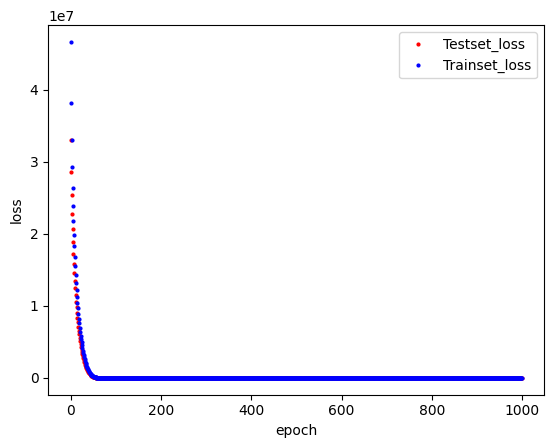

In [205]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

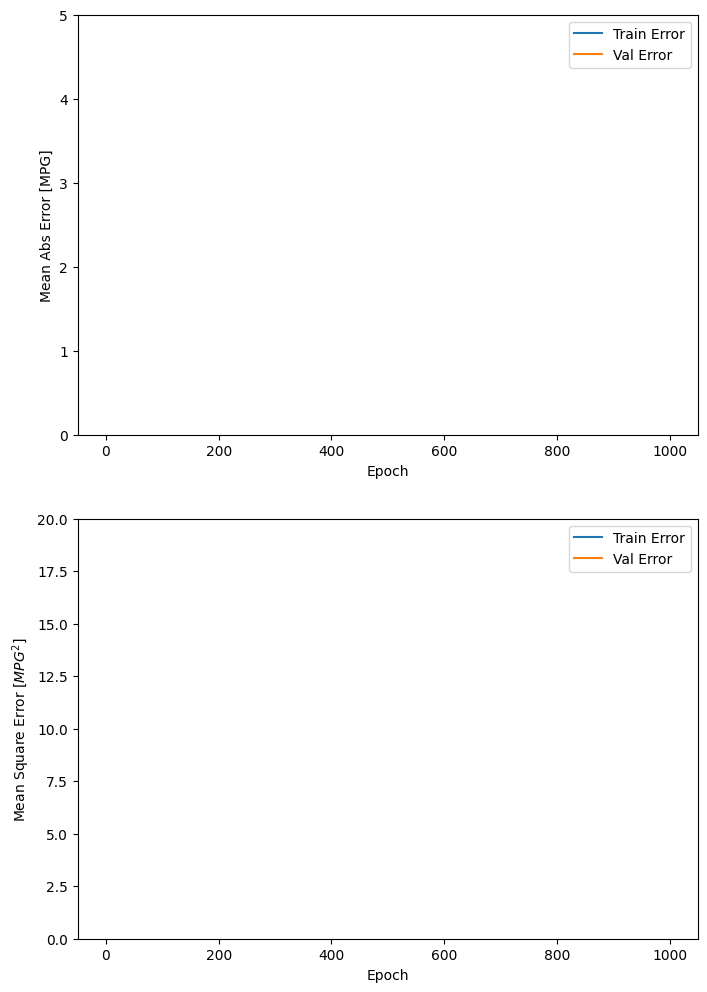

In [206]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


...........................................................................................

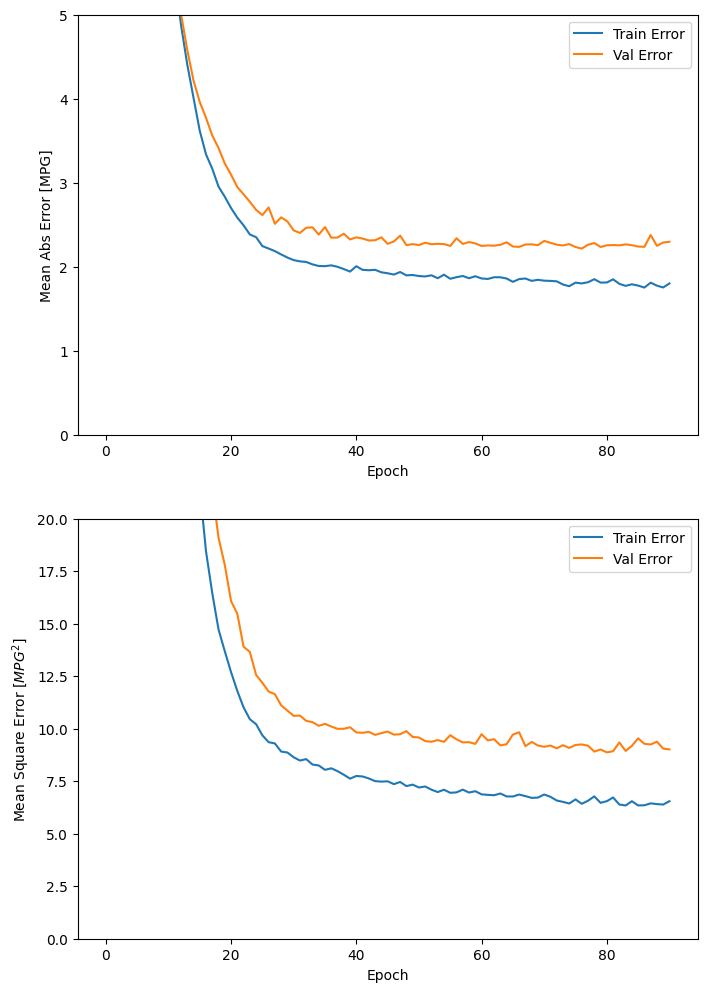

In [207]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)